Reto 01 Analisis Datos de Salud
Grupo 10 
Integrantes : 
Judith Granados Granados
David Julian Ortiz 
Dylan Ortega 
Angie Katherine Ardila Gomez 
Ramiro Andres Jaimes Blanco


In [28]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
#Seaborn es una biblioteca de visualización de datos en Python que se basa en Matplotlib
import seaborn as sns


In [29]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('medical_examination.csv',index_col= 0)
# Mostrar las primeras filas del dataframe
print(df.head())


      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


In [30]:
df = pd.read_csv('medical_examination.csv',index_col= 0)
# Convertir 'age' de días a años (suponiendo que 'age' está en días)
df['age'] = df['age'] / 365.25  # Divide por el promedio de días por año
# Opcional: redondear la edad a un número entero
df['age'] = df['age'].round()

# Mostrar las primeras filas del dataframe
print(df.head())


     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                         
0   50.0       2     168    62.0    110     80            1     1      0   
1   55.0       1     156    85.0    140     90            3     1      0   
2   52.0       1     165    64.0    130     70            3     1      0   
3   48.0       2     169    82.0    150    100            1     1      0   
4   48.0       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0  


In [31]:
#Reemplazamos los valores faltantes y eliminamos duplicados.
# Reemplazar valores faltantes con la media de cada columna
df.fillna(df.mean(), inplace=True)
# Eliminar registros duplicados
df.drop_duplicates(inplace=True)


                age        gender        height        weight         ap_hi  \
count  66181.000000  66181.000000  66181.000000  66181.000000  66181.000000   
mean      53.327405      1.357399    164.345598     74.581047    129.306417   
std        6.803704      0.479584      8.353505     14.613360    158.371880   
min       30.000000      1.000000     55.000000     10.000000   -150.000000   
25%       48.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       58.000000      2.000000    170.000000     83.000000    140.000000   
max       65.000000      3.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  66181.000000  66181.000000  66181.000000  66181.000000  66181.000000   
mean      97.608800      1.386002      1.238135      0.092746      0.056708   
std      193.786844      0.692218      0.584102    

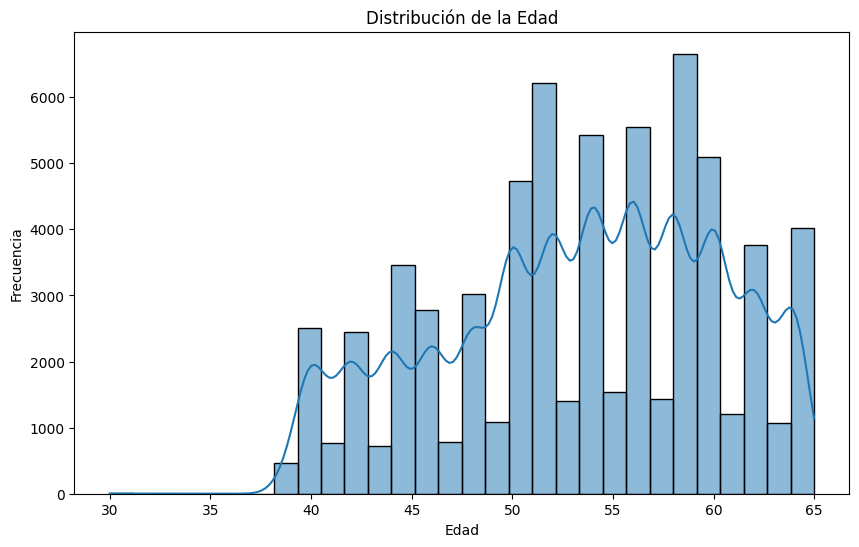

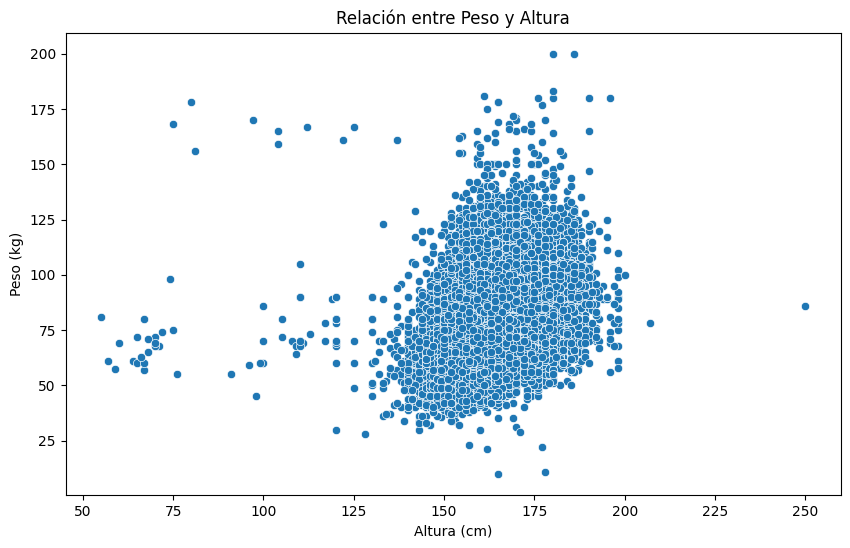

In [32]:
#Realizamos un análisis exploratorio de datos para entender mejor el conjunto de datos.
# Descripción estadística del dataframe
print(df.describe())
# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
# Relación entre peso y altura
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Relación entre Peso y Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()


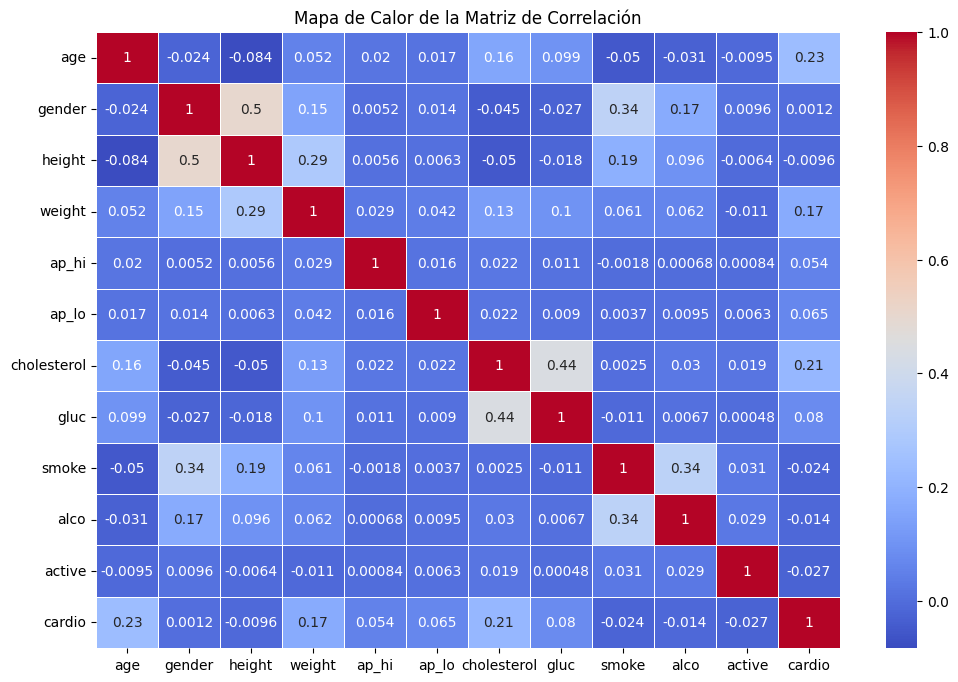

In [33]:
#Analizamos la correlación entre diferentes variables.
# Matriz de correlación
corr_matrix = df.corr()
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


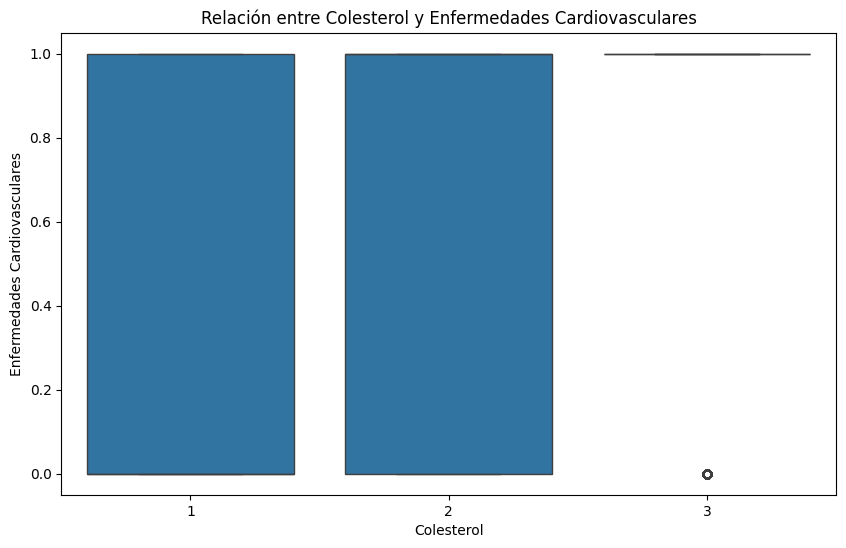

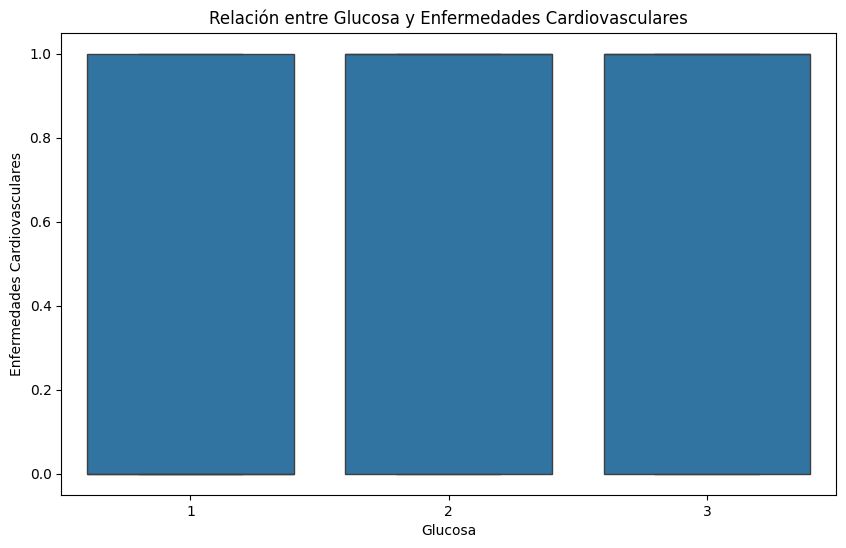

In [34]:
#Visualizamos la relación entre diferentes variables médicas.
# Relación entre colesterol y enfermedades cardiovasculares
plt.figure(figsize=(10, 6))
sns.boxplot(x='cholesterol', y='cardio', data=df)
plt.title('Relación entre Colesterol y Enfermedades Cardiovasculares')
plt.xlabel('Colesterol')
plt.ylabel('Enfermedades Cardiovasculares')
plt.show()
# Relación entre glucosa y enfermedades cardiovasculares
plt.figure(figsize=(10, 6))
sns.boxplot(x='gluc', y='cardio', data=df)
plt.title('Relación entre Glucosa y Enfermedades Cardiovasculares')
plt.xlabel('Glucosa')
plt.ylabel('Enfermedades Cardiovasculares')
plt.show()


In [35]:
#Conteo de Hombre y Mujeres 
conteo_genero = df['gender'].value_counts()
print(conteo_genero)

gender
1    42539
2    23631
3       11
Name: count, dtype: int64


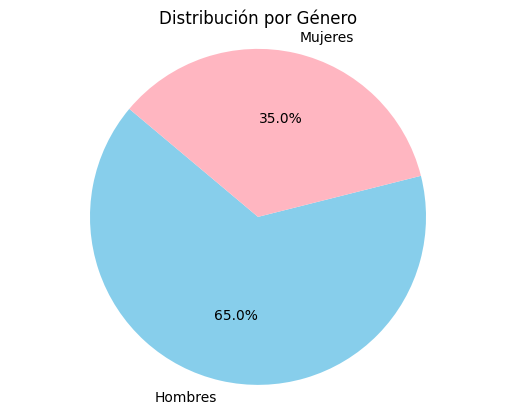

In [36]:
#grafico hombre vs mujeres
labels = ['Hombres', 'Mujeres']
sizes = [45522, 24467]  
colors = ['skyblue', 'lightpink']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución por Género')
plt.show()

In [55]:
#Separa datos de mujeres
df_mujeres = df[(df['gender'] ==2) ]
print(df_mujeres)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
0      50.0       2     168    62.0    110     80            1     1      0   
3      48.0       2     169    82.0    150    100            1     1      0   
12     62.0       2     178    95.0    130     90            3     3      0   
16     52.0       2     173    60.0    120     80            1     1      0   
18     40.0       2     165    60.0    120     80            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
99971  49.0       2     167    69.0    110     80            1     1      0   
99972  48.0       2     182   110.0    130     90            2     2      0   
99975  49.0       2     168    80.0    120     80            1     1      0   
99993  53.0       2     168    76.0    120     80            1     1      1   
99996  52.0       2     183   105.0    180     90   

In [38]:
#Separar datos de hombres 
df_hombres = df[(df['gender'] ==1) ]
print(df_hombres)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                            
1      55.0       1     156    85.0    140     90            3     1      0   
2      52.0       1     165    64.0    130     70            3     1      0   
4      48.0       1     156    56.0    100     60            1     1      0   
8      60.0       1     151    67.0    120     80            2     2      0   
9      61.0       1     157    93.0    130     80            3     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
99991  54.0       1     172    70.0    130     90            1     1      0   
99992  58.0       1     165    80.0    150     80            1     1      0   
99995  62.0       1     158   126.0    140     90            2     2      0   
99998  61.0       1     163    72.0    135     80            1     2      0   
99999  56.0       1     170    72.0    120     80   

In [39]:
# Media en Hombres
media_hombres = df_hombres.mean()
print(media_hombres)

age             53.447683
gender           1.000000
height         161.205788
weight          72.954277
ap_hi          128.695738
ap_lo           95.575613
cholesterol      1.409036
gluc             1.249771
smoke            0.019112
alco             0.027269
active           0.794706
cardio           0.513223
dtype: float64


In [40]:
#Moda en Hombres
moda_hombres = df_hombres.mode()
print(moda_hombres)

    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  56.0       1     160    65.0    120     80            1     1      0     0   

   active  cardio  
0       1       1  


In [41]:
#Mediana en Hombres
mediana_hombres = df_hombres.median()
print(mediana_hombres)

age             54.0
gender           1.0
height         161.0
weight          70.0
ap_hi          120.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           1.0
dtype: float64


In [42]:
#Media de Mujeres
media_mujeres = df_mujeres.mean()
print(media_mujeres)

age             53.110152
gender           2.000000
height         169.999831
weight          77.511671
ap_hi          130.407939
ap_lo          101.276163
cholesterol      1.344590
gluc             1.217299
smoke            0.225340
alco             0.109729
active           0.802632
cardio           0.514621
dtype: float64


In [43]:
#Moda de Mujeres
moda_mujeres = df_mujeres.mode()
print(moda_mujeres)

    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  58.0       2     170    70.0    120     80            1     1      0     0   

   active  cardio  
0       1       1  


In [44]:
#Mediana de Mujeres
mediana_mujeres = df_mujeres.median()
print(mediana_mujeres)

age             54.0
gender           2.0
height         170.0
weight          75.0
ap_hi          120.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           1.0
dtype: float64


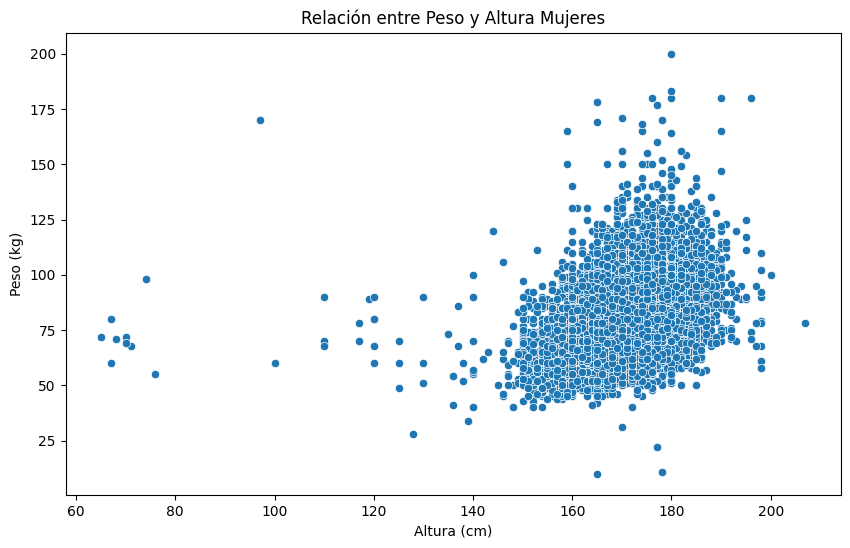

In [45]:
# Relación entre peso y altura De Mujeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df_mujeres)
plt.title('Relación entre Peso y Altura Mujeres')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

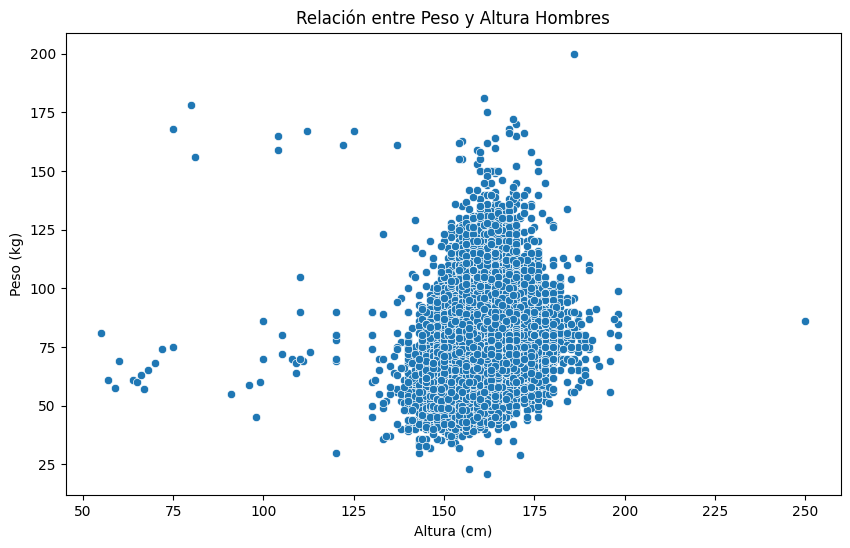

In [46]:
# Relación entre peso y altura De Hombres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df_hombres)
plt.title('Relación entre Peso y Altura Hombres')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

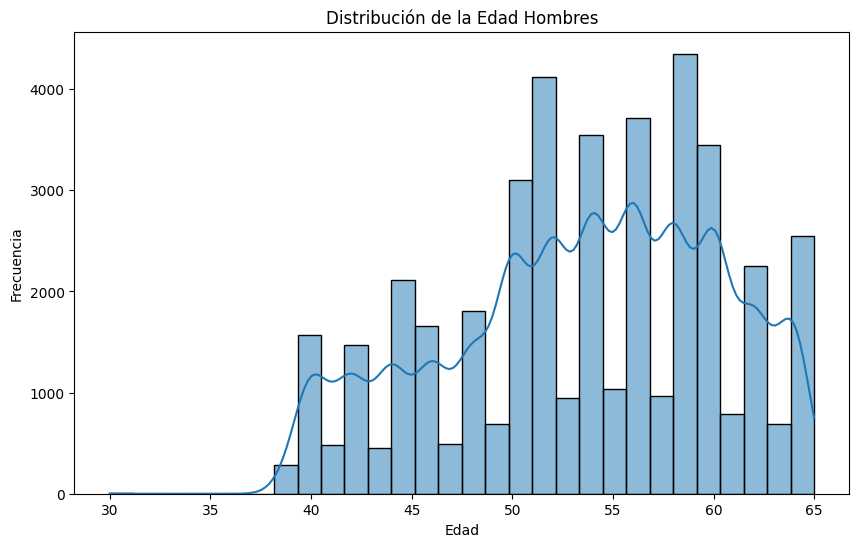

In [47]:
# Distribución de la edad Hombres
plt.figure(figsize=(10, 6))
sns.histplot(df_hombres['age'], bins=30, kde=True)
plt.title('Distribución de la Edad Hombres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

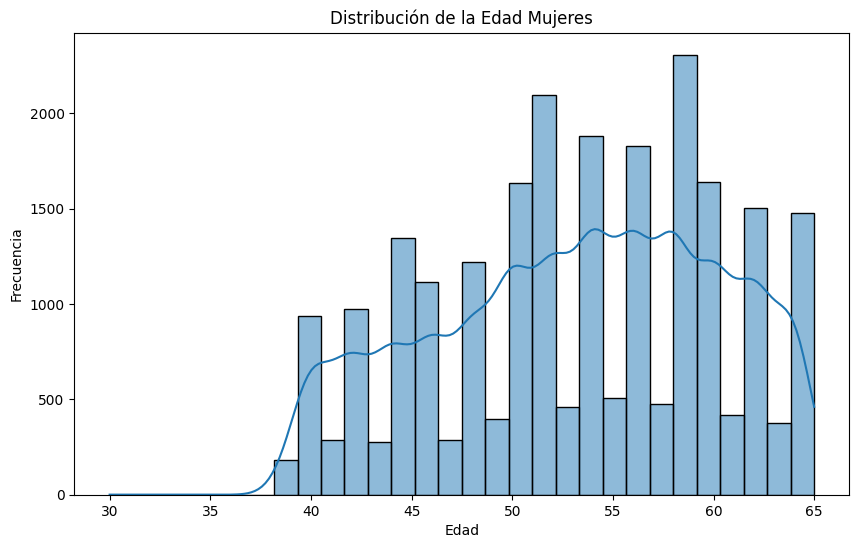

In [48]:
# Distribución de la edad Mujeres
plt.figure(figsize=(10, 6))
sns.histplot(df_mujeres['age'], bins=30, kde=True)
plt.title('Distribución de la Edad Mujeres')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones

A partir de los datos obtenidos, se pueden analizar los siguientes aspectos:

Los usuarios son personas mayores de 35 años, con un pico más alto entre los 57 y 58 años, correspondiente a 7,000 usuarios.
Se puede determinar que, a mayor altura, suele haber mayor peso, y que la mayor densidad en el gráfico se encuentra entre los 1.70 m de altura y los 100 kg.
La correlación muestra la relación entre dos variables (aumento o disminución). En el gráfico, la mayoría de los datos tienden a un valor cercano a 0; sin embargo, los colores permiten distinguir relaciones significativas entre variables como género y altura, y entre colesterol y glucosa, reflejando estos últimos los valores más altos registrados, lo cual indica una mayor correlación.
La mayoría de las mujeres son más altas que los hombres, aunque pesan menos.
La mayoría de los usuarios son hombres, con un 65%, mientras que las mujeres representan el 35%.
La distribución de edades entre ambos géneros muestra que en las mujeres es más uniforme en comparación con los hombres.